In [9]:
import numpy as np
import pandas as pd
import xlrd
from matplotlib.pyplot import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


df = pd.read_excel(r".../Concrete_Data.xls")
df


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


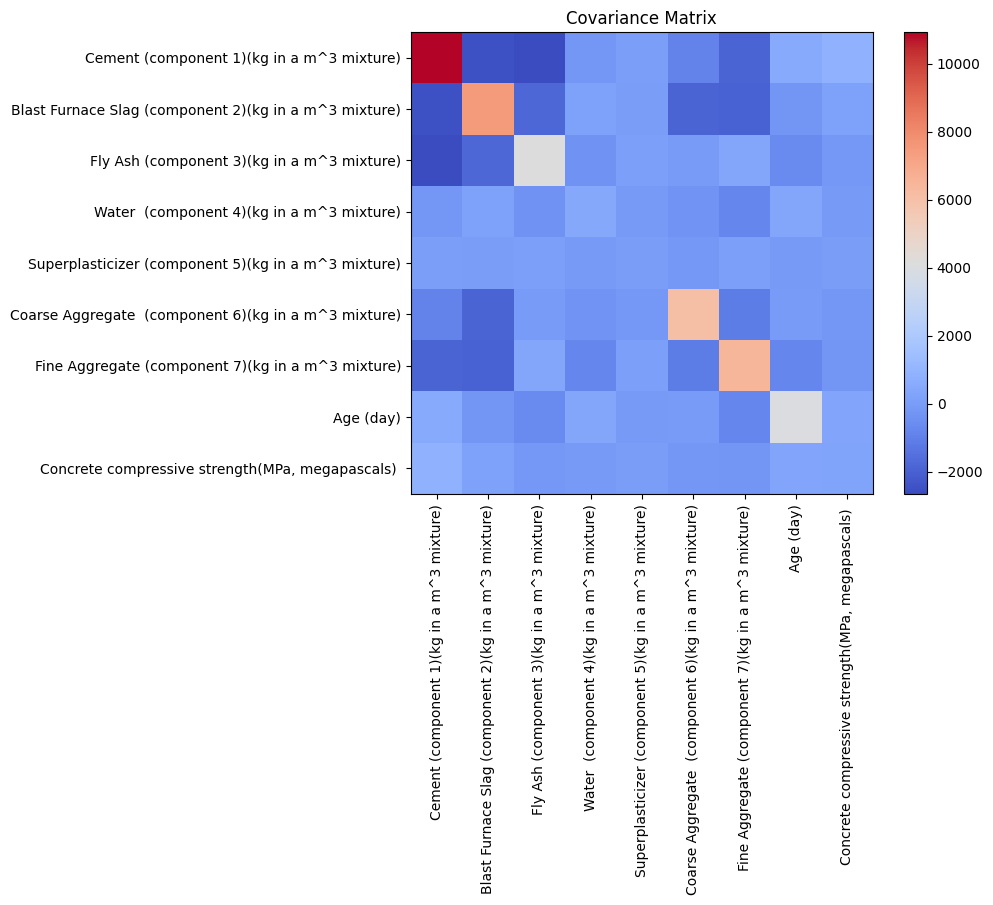

In [4]:
#Check for covariance between the data!! COMMENT
cov_matrix = df.cov()

# Display the covariance matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Covariance Matrix")
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

C:\Users\stamg\anaconda3\envs\ml\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


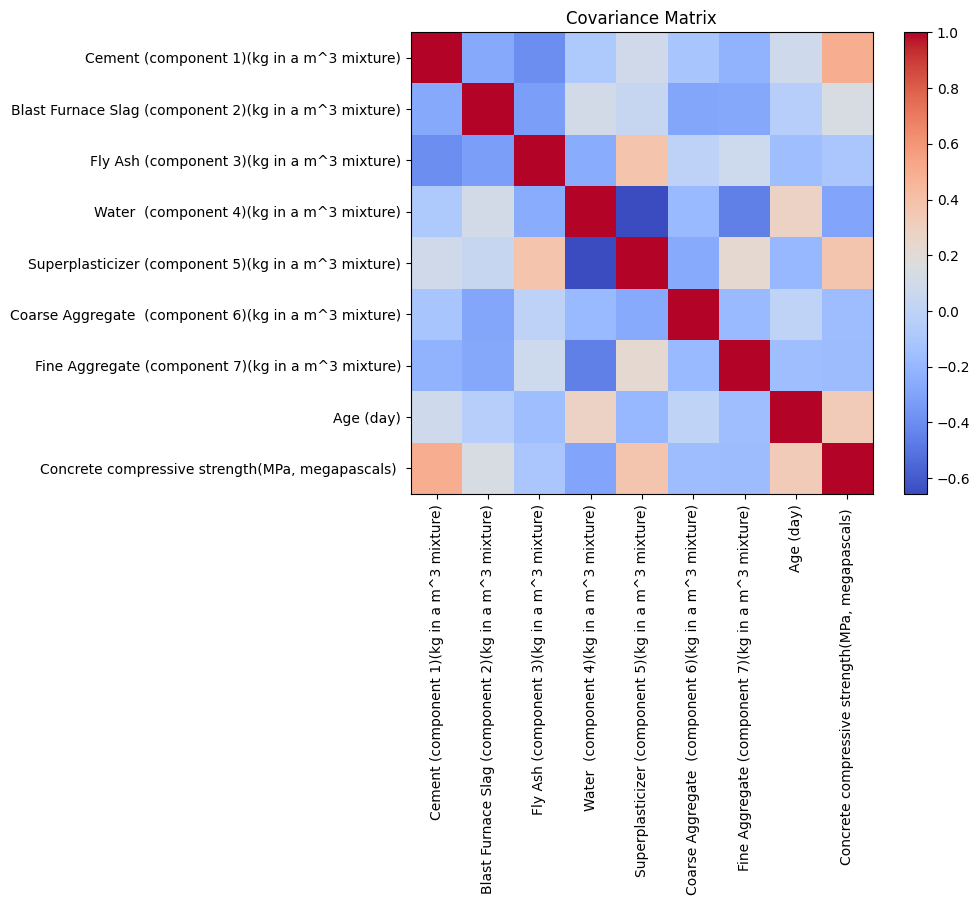

In [46]:
#DIFFERENCE BETWEEN COVARIANCE OF THE ORIGINAL AND NORMALIZED DATA!!!
'''
With the normalization of the data we can see that now there is more correlation between them, 
compared to the original, since now the data are centered and 
The normalization process has made the components more comparable by centering them around zero and scaling them.
The red diagonal indicates that each component’s variance is preserved (variance = 1 after normalization).
The increased variation in off-diagonal elements suggests that the normalized components now exhibit stronger linear associations.
'''
# Assuming df is your DataFrame with the data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = df_normalized.cov()

# Display the covariance matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Covariance Matrix")
plt.xticks(range(len(df_normalized.columns)), df_normalized.columns, rotation=90)
plt.yticks(range(len(df_normalized.columns)), df_normalized.columns)
plt.show()

C:\Users\stefa\AppData\Local\Temp\ipykernel_12628\3600753675.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=2, w_pad=150)  # Adjust both vertical and horizontal spacing


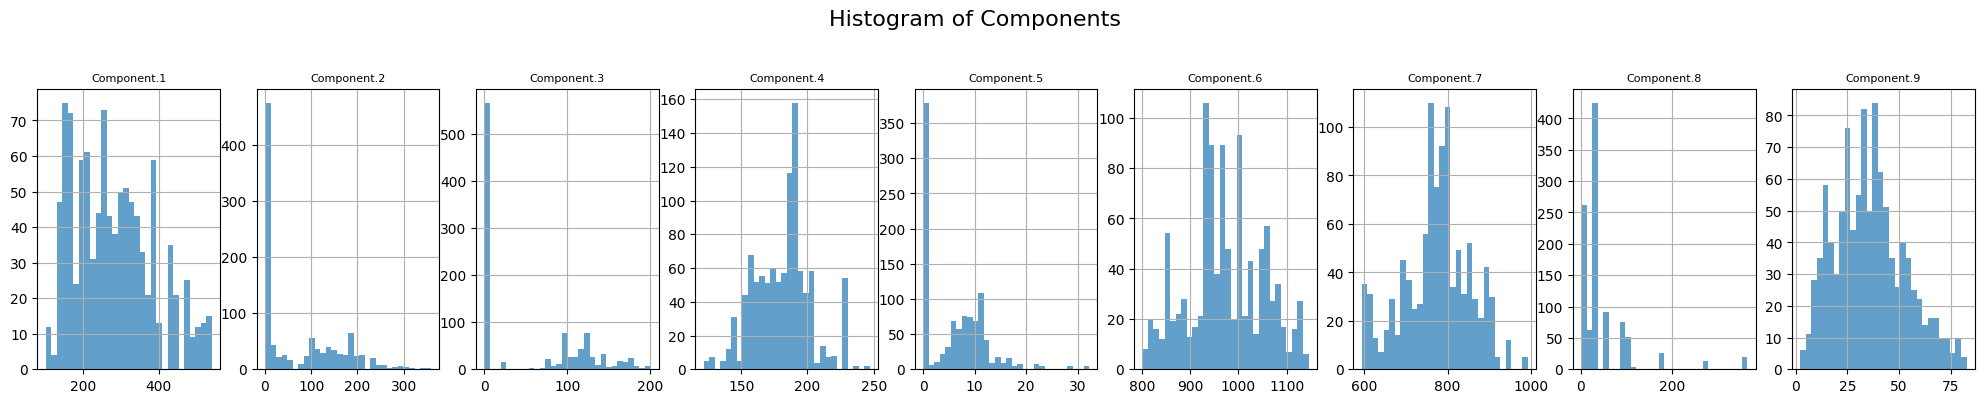

C:\Users\stefa\AppData\Local\Temp\ipykernel_12628\3600753675.py:41: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=2, w_pad=150)  # Adjust both vertical and horizontal spacing


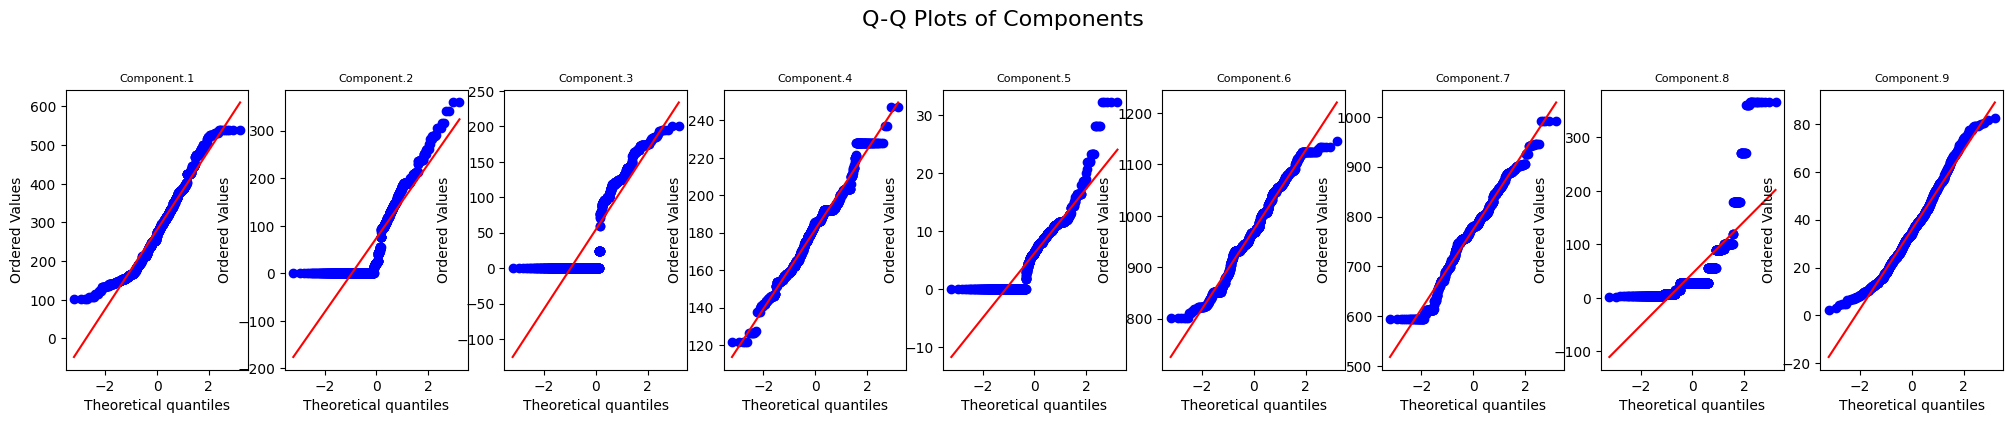

In [53]:
#Corrections for
#1.The summary statistics needs some comments, and you skipped looking at normal distribution and normalization of the data
#Histograms:
#The histograms (blue plots) display the distribution of your data for each column.
#They show how the data is spread across different values.
#Q-Q Plots:
#The Q-Q plots (red lines) compare the quantiles of your data to the quantiles of a theoretical normal distribution (the red line).
#If the blue points closely follow the red line, it indicates that your data approximately follows a normal distribution.
#Deviations from the red line suggest departures from normality.
#Interpretation:
#When the blue points closely align with the red line, it suggests that your data is normally distributed.
#If the blue points deviate significantly from the red line, your data may not be normally distributed.

# Create a histogram for each column
new_column_names = {col: f'Component.{i+1}' for i, col in enumerate(df.columns)}

# Create a single plot for histograms of components
plt.figure(figsize=(25, 8))
plt.suptitle("Histogram of Components", fontsize=16)  # Headline

for i, column in enumerate(df.columns):
    plt.subplot(2, len(df.columns), i+1)
    df[column].hist(bins=30, alpha=0.7)
    plt.title(f'{new_column_names[column]}', fontsize=8)  # Adjust font size

plt.tight_layout(h_pad=2, w_pad=150)  # Adjust both vertical and horizontal spacing
plt.show()

# Add some space
print("\n" * 5)  # You can adjust the number of empty lines as needed

# Create a single plot for Q-Q plots of components
plt.figure(figsize=(25, 8))
plt.suptitle("Q-Q Plots of Components", fontsize=16)  # Headline

for i, column in enumerate(df.columns):
    plt.subplot(2, len(df.columns), i+1)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'{new_column_names[column]}', fontsize=8)  # Adjust font size

plt.tight_layout(h_pad=2, w_pad=150)  # Adjust both vertical and horizontal spacing
plt.show()


C:\Users\stamg\AppData\Local\Temp\ipykernel_13816\1053253941.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=2, w_pad=150)  # Adjust both vertical and horizontal spacing


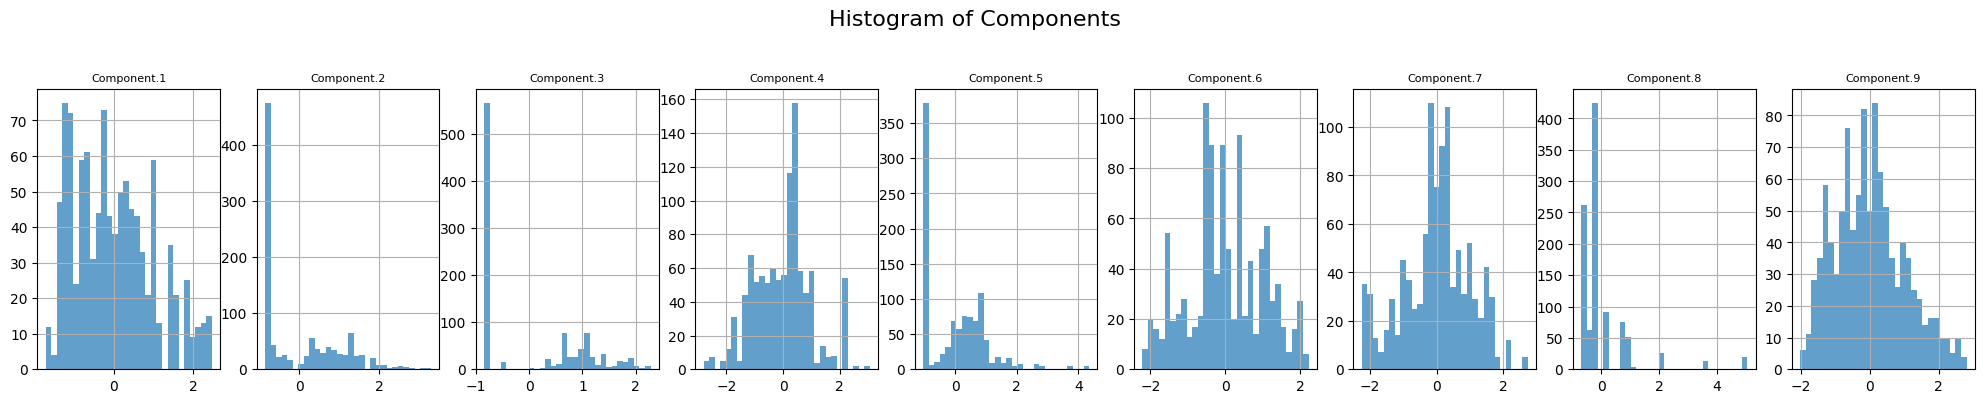

C:\Users\stamg\AppData\Local\Temp\ipykernel_13816\1053253941.py:51: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=2, w_pad=150)  # Adjust both vertical and horizontal spacing


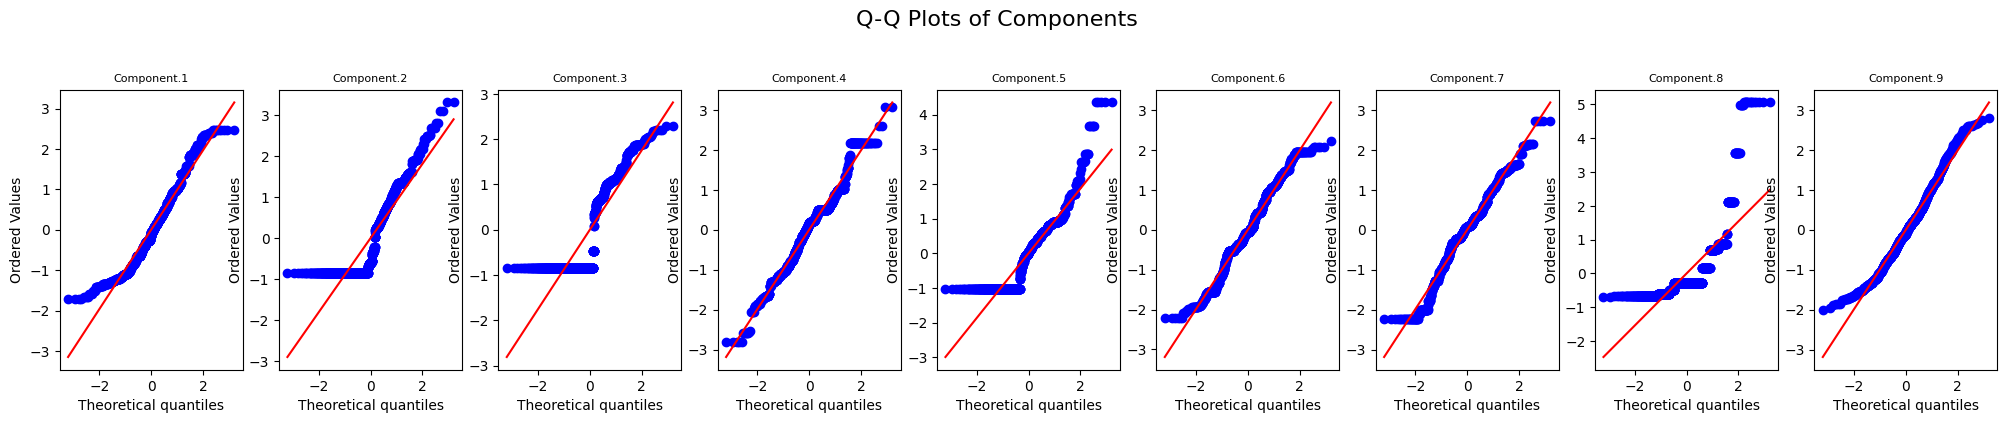

In [47]:

'''
SINGLE IMAGES
# Create a scaler object 

# Now df_normalized is your normalized data

for column in df_normalized.columns:
    plt.figure(figsize=(6,4))
    df_normalized[column].hist(bins=30)
    plt.title(f'Histogram of {column} (normalized)')
    plt.show()
    



# Create a single plot for histograms of normalized data
plt.figure(figsize=(10, 6))
for i, column in enumerate(df_normalized.columns):
    plt.subplot(1, len(df_normalized.columns), i+1)
    df_normalized[column].hist(bins=30, alpha=0.7)
    plt.title(f'Histogram of {column} (normalized)')

plt.tight_layout()
plt.show()
'''


new_column_names = {col: f'Component.{i+1}' for i, col in enumerate(df_normalized.columns)}

# Create a single plot for histograms of components
plt.figure(figsize=(25, 8))
plt.suptitle("Histogram of Components", fontsize=16)  # Headline

for i, column in enumerate(df_normalized.columns):
    plt.subplot(2, len(df_normalized.columns), i+1)
    df_normalized[column].hist(bins=30, alpha=0.7)
    plt.title(f'{new_column_names[column]}', fontsize=8)  # Adjust font size

plt.tight_layout(h_pad=2, w_pad=150)  # Adjust both vertical and horizontal spacing
plt.show()


plt.figure(figsize=(25, 8))
plt.suptitle("Q-Q Plots of Components", fontsize=16)  # Headline

for i, column in enumerate(df_normalized.columns):
    plt.subplot(2, len(df_normalized.columns), i+1)
    stats.probplot(df_normalized[column], dist="norm", plot=plt)
    plt.title(f'{new_column_names[column]}', fontsize=8)  # Adjust font size

plt.tight_layout(h_pad=2, w_pad=150)  # Adjust both vertical and horizontal spacing
plt.show()



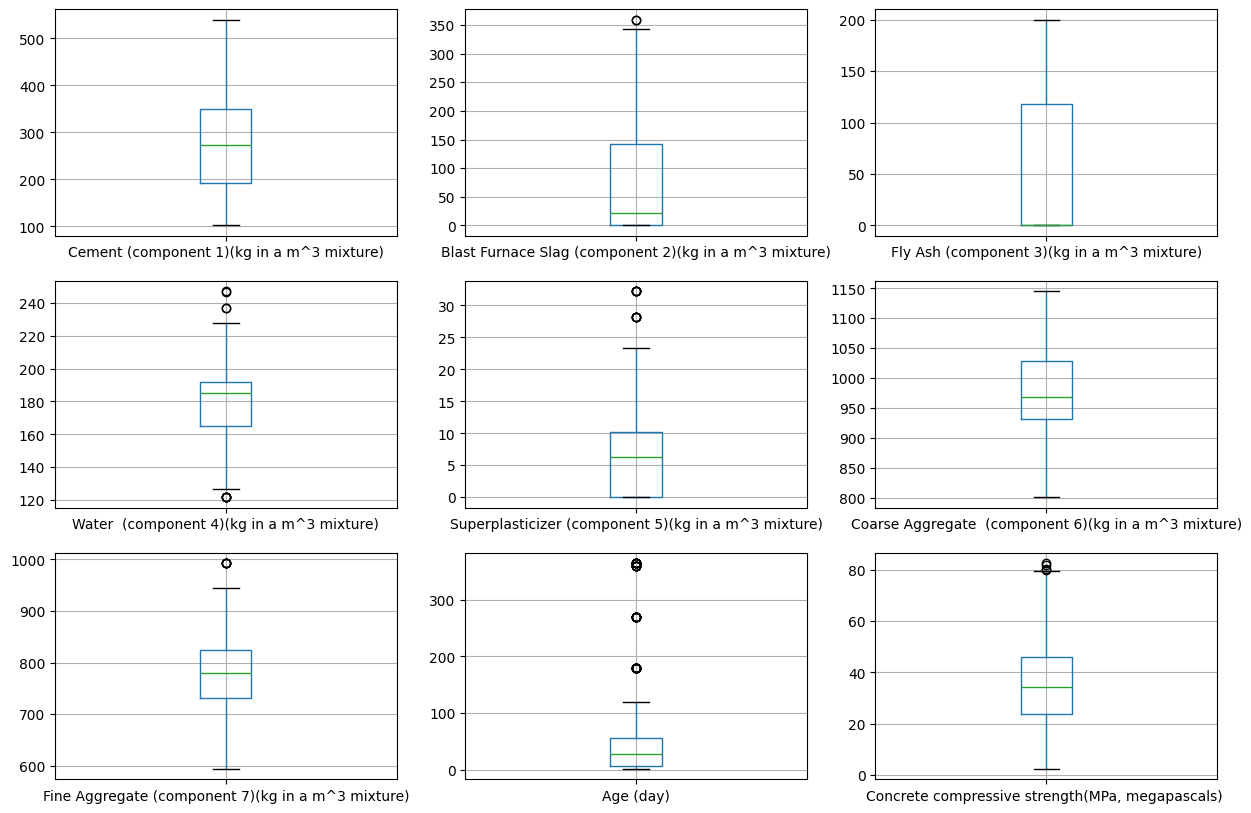

In [44]:
# Create a new figure
plt.figure(figsize=(15,10))

# For each column in the DataFrame, create a subplot and plot a boxplot
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    df.boxplot([column])

plt.savefig("outliers.png" , bbox_inches='tight')
plt.show()

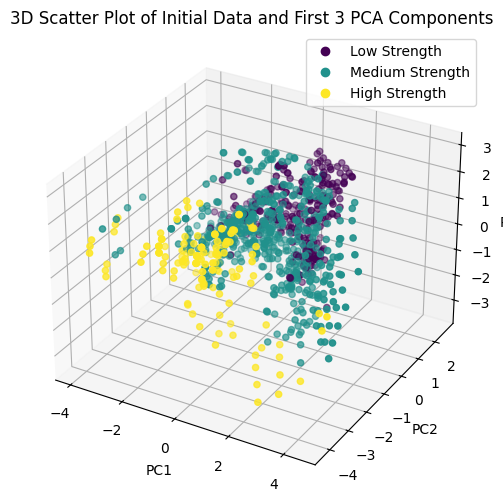

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Assuming df is your DataFrame with the data

# Step 1: Standardize the data (mean=0, variance=1)
df_standardized = (df - df.mean()) / df.std()

# Step 2: Calculate the covariance matrix
cov_matrix = df_standardized.cov()

# Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
eigenvalue_index_sorted = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalue_index_sorted]
eigenvectors_sorted = eigenvectors[:, eigenvalue_index_sorted]

# Choose the number of components you want to keep (3 components for this example)
n_components = 3

# Select the top 'n_components' eigenvectors
top_eigenvectors = eigenvectors_sorted[:, :n_components]

# Project the data onto the new feature space
df_pca = df_standardized.dot(top_eigenvectors)

# Plot a 3D scatter plot for the first 3 PCA components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

target = np.select(
    [df[df.columns[8]] < 25,
     df[df.columns[8]] < 55,
     df[df.columns[8]] >= 55],
    [0, 1, 2],
    np.nan
)
target_names = ['Low Strength', 'Medium Strength', 'High Strength']
scatter = ax.scatter(df_pca[0], df_pca[1], df_pca[2], c=target)

# Add labels for the columns
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Initial Data and First 3 PCA Components')
# Legend
handles, labels = scatter.legend_elements()
ax.legend(handles, target_names)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

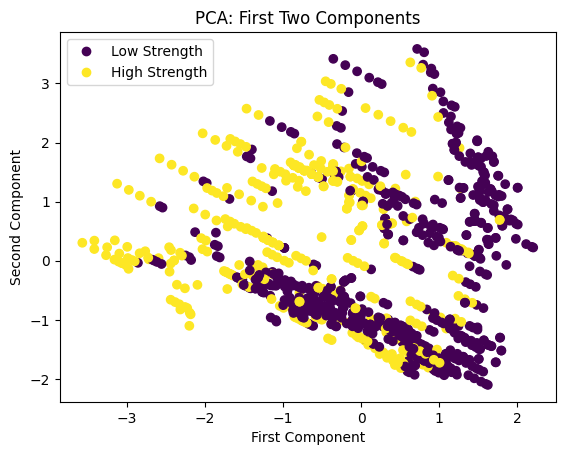

In [49]:
from sklearn.decomposition import PCA

# Step 1: Standardize the data (mean=0, variance=1)
df_standardized = (df - df.mean()) / df.std()

# Step 2: Calculate the covariance matrix
cov_matrix = df.cov()

# Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
eigenvalue_index_sorted = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalue_index_sorted]
eigenvectors_sorted = eigenvectors[:, eigenvalue_index_sorted]

# Choose the number of components you want to keep (3 components for this example)
n_components = 3

# Select the top 'n_components' eigenvectors
top_eigenvectors = eigenvectors_sorted[:, :n_components]

# Project the data onto the new feature space
df_pca = df_standardized.dot(top_eigenvectors)


target = np.select(
    [df[df.columns[8]] < 40,
     df[df.columns[8]] >= 40],
    [0, 1],
    np.nan
)
target_names = ['Low Strength', 'High Strength']
plt.tight_layout()
plt.show()
# Optional: Visualize the first two components (for 2D visualization)
plt.scatter(df_pca[0], df_pca[1], c=target)
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("PCA: First Two Components")
handles, labels = scatter.legend_elements()
plt.legend(handles, target_names)
plt.savefig("PCAnotSTD.png" , bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

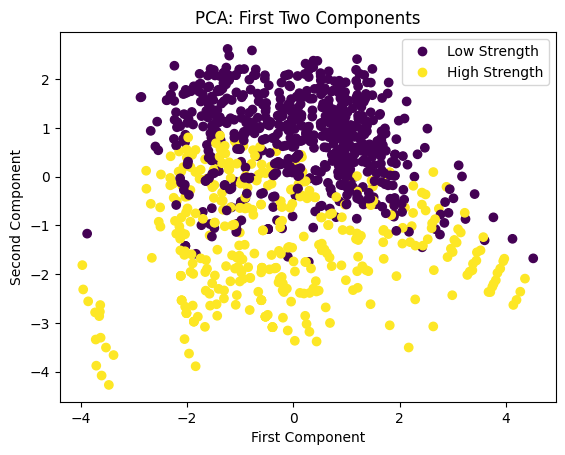

In [50]:
from sklearn.decomposition import PCA

# Step 1: Standardize the data (mean=0, variance=1)
df_standardized = (df - df.mean()) / df.std()

# Step 2: Calculate the covariance matrix
cov_matrix = df_standardized.cov()

# Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
eigenvalue_index_sorted = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalue_index_sorted]
eigenvectors_sorted = eigenvectors[:, eigenvalue_index_sorted]

# Choose the number of components you want to keep (3 components for this example)
n_components = 3

# Select the top 'n_components' eigenvectors
top_eigenvectors = eigenvectors_sorted[:, :n_components]

# Project the data onto the new feature space
df_pca = df_standardized.dot(top_eigenvectors)


target = np.select(
    [df[df.columns[8]] < 40,
     df[df.columns[8]] >= 40],
    [0, 1],
    np.nan
)
target_names = ['Low Strength', 'High Strength']
plt.tight_layout()
plt.show()
# Optional: Visualize the first two components (for 2D visualization)
plt.scatter(df_pca[0], df_pca[1], c=target)
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("PCA: First Two Components")
handles, labels = scatter.legend_elements()
plt.legend(handles, target_names)
plt.savefig("PCA.png" , bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

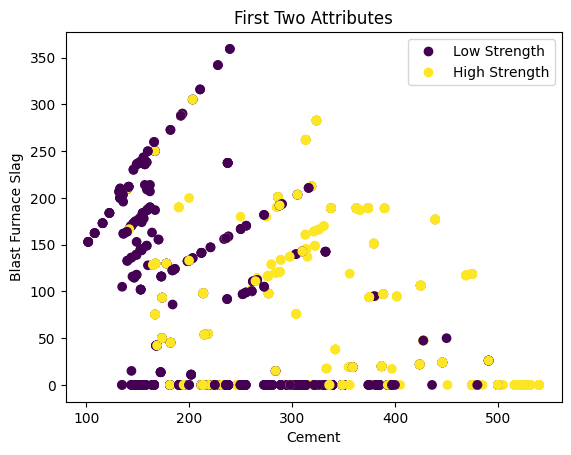

In [42]:
target = np.select(
    [df[df.columns[8]] < 40,
     df[df.columns[8]] >= 40],
    [0, 1],
    np.nan
)
target_names = ['Low Strength', 'High Strength']
plt.tight_layout()
plt.show()
# Optional: Visualize the first two components (for 2D visualization)
scatter = plt.scatter(df.iloc[:, 0].values, df.iloc[:, 1].values, c=target)
plt.xlabel("Cement")
plt.ylabel("Blast Furnace Slag")
plt.title("First Two Attributes")
handles, labels = scatter.legend_elements()
plt.legend(handles, target_names)
plt.savefig("noPCA.png" , bbox_inches='tight')
plt.show()

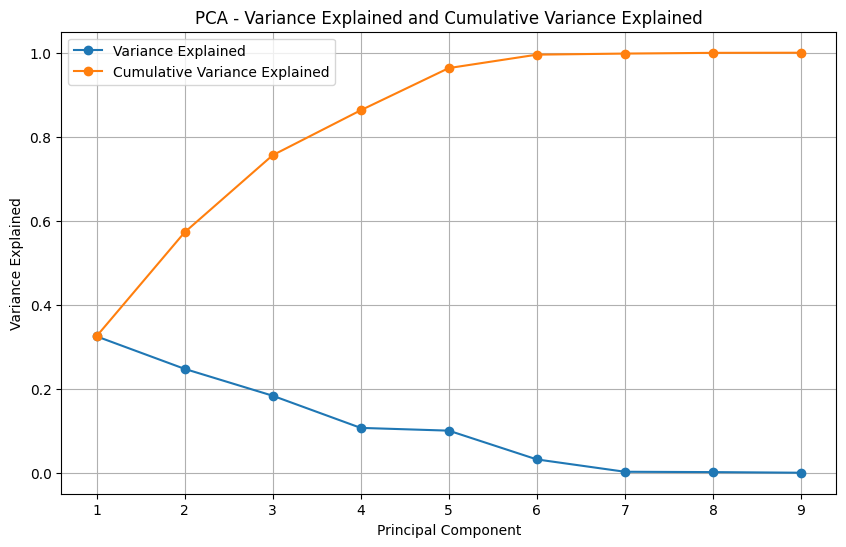

Number of components needed for 99% variance explained: 6
Number of components needed for 95% variance explained: 5
Number of components needed for 90% variance explained: 5


In [43]:
# Assuming df is your DataFrame with the NanoNose data

# Step 1: Subtract the mean from the data
X = df.values  # Convert DataFrame to NumPy array
Y = X - np.ones((X.shape[0], 1)) * X.mean(0)

# Step 2: Compute the SVD (Singular Value Decomposition)
U, S, VT = np.linalg.svd(Y)

# Step 3: Compute the percentage of variance explained by each principal component
explained_variance_ratio = (S ** 2) / np.sum(S ** 2)

# Step 4: Compute the cumulative variance explained
cumulative_variance_explained = np.cumsum(explained_variance_ratio)

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', label='Variance Explained')
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o', linestyle='-', label='Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Variance Explained and Cumulative Variance Explained')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Step 6: Determine the number of components needed for 95% variance explained
components_needed_for_99_percent = np.argmax(cumulative_variance_explained >= 0.99) + 1
components_needed_for_95_percent = np.argmax(cumulative_variance_explained >= 0.95) + 1
components_needed_for_90_percent = np.argmax(cumulative_variance_explained >= 0.90) + 1
print(f"Number of components needed for 99% variance explained: {components_needed_for_99_percent}")
print(f"Number of components needed for 95% variance explained: {components_needed_for_95_percent}")
print(f"Number of components needed for 90% variance explained: {components_needed_for_90_percent}")


[3.24914758e-01 2.47514550e-01 1.83574958e-01 1.00435375e-01
 1.07003031e-01 3.19455277e-02 2.57134156e-03 1.75698399e-03
 2.83475302e-04]


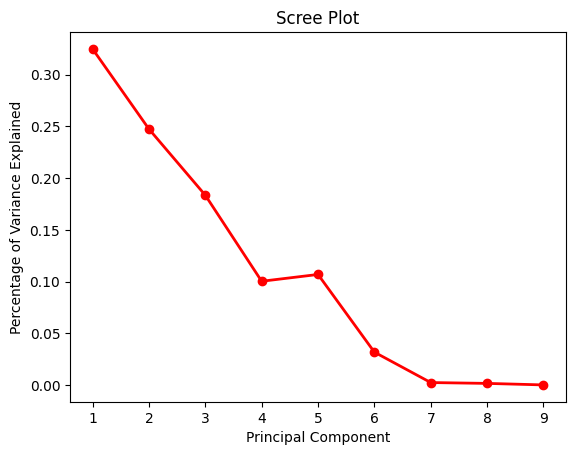

In [61]:
#Maybe we should keep this plot 

df = pd.read_excel(r".../Concrete_Data.xls")

#standardized data
B = (df - df.mean())

#Transpose of standardized data
BT = B.transpose()  

#Covariance Matrix 
c = np.matmul(BT, B)

#Getting the eigenvector
eigenvalues, eigenvectors = np.linalg.eig(c)

#Principal component
T = np.matmul(B, eigenvectors)
#print(T)

#Variance
variance = eigenvalues / sum(eigenvalues)
print(variance)
plt.plot(range(1,len(variance)+1), variance, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.show()

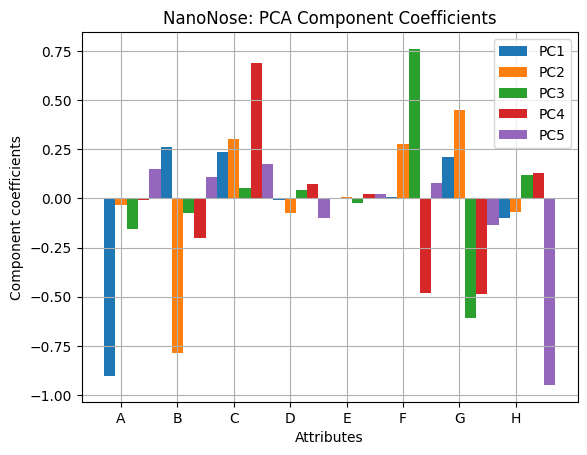

In [67]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

y = df.iloc[:,-1:].values

# Preallocate memory, then extract excel data to matrix X
X = np.empty((1030, 8))
for i, col_id in enumerate(range(8)):
    X[:, i] = df.loc[:,df.columns[i]].values

# Compute values of N, M and C.
N = len(y)


Y = X - np.ones((N,1))*X.mean(0)
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape

attributeNames=['A','B','C','D','E','F','G','H']
pcs = [0,1,2,3,4]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b','y','p']
bw = .2
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.show()

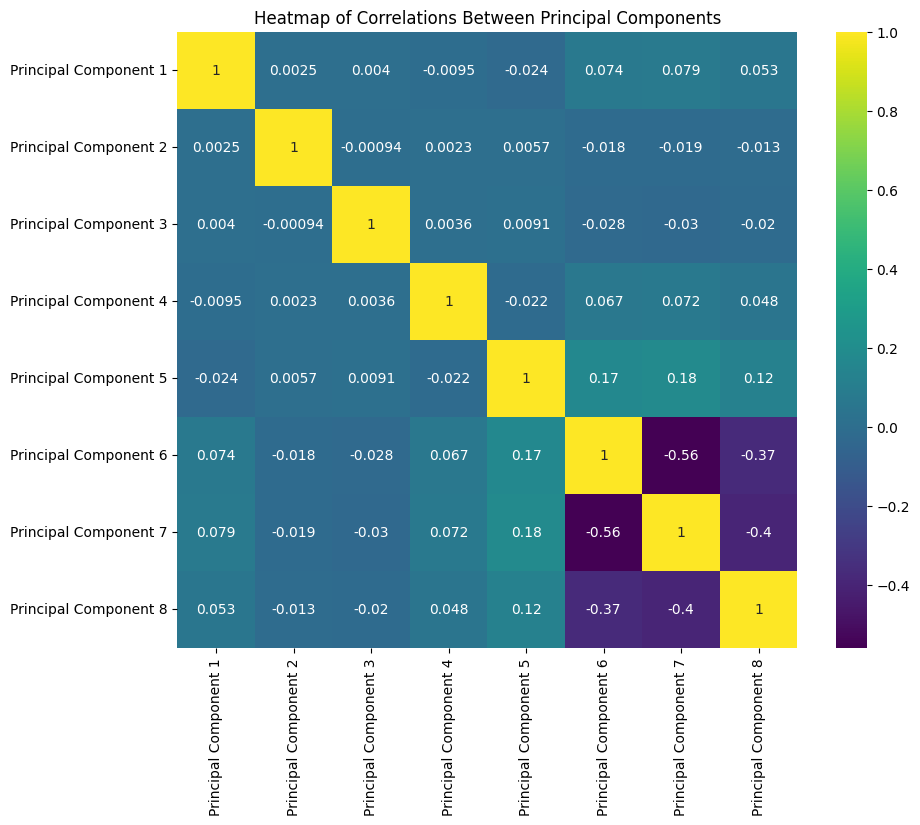

In [75]:
# Create a DataFrame with the principal components
df_pca = pd.DataFrame(V, columns=attributeNames)
corr_matrix = df_pca.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True)
plt.title('Heatmap of Correlations Between Principal Components')
plt.show()

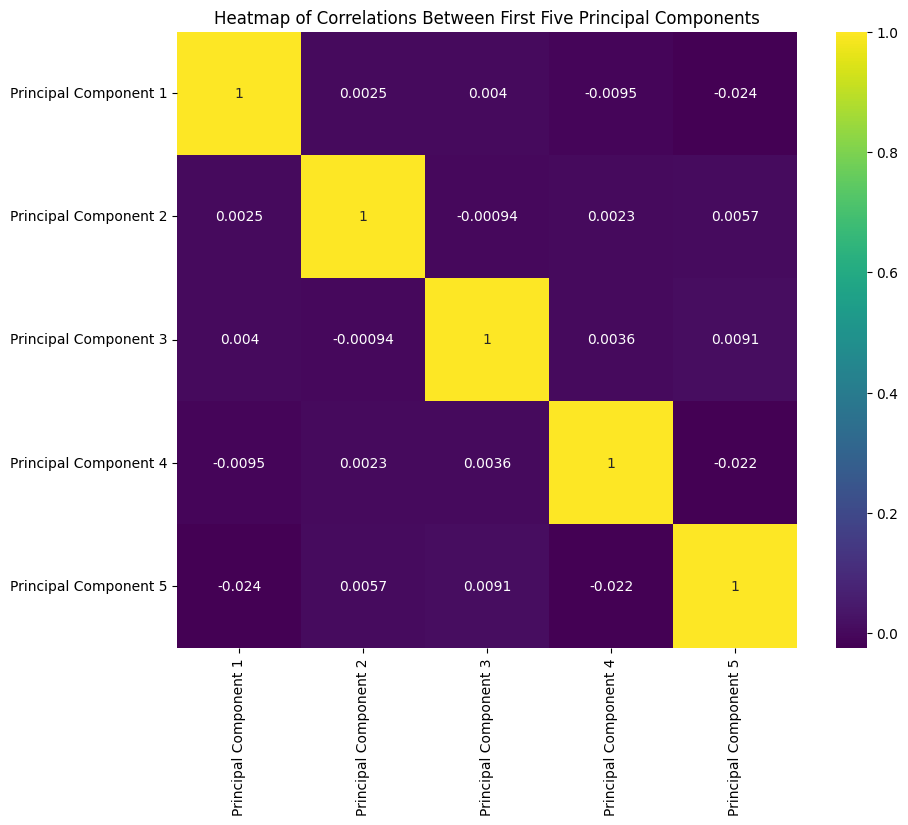

In [76]:
df_pca_5 = df_pca.iloc[:, :5]
corr_matrix_5 = df_pca_5.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_5, cmap='viridis', annot=True)
plt.title('Heatmap of Correlations Between First Five Principal Components')
plt.show()

In [77]:
'''
COMMENTS REGARDING THE HEATMAPS:
Yes, that’s correct! The purpose of Principal Component Analysis (PCA) is to transform the original variables into a new set of variables,
the principal components, which are uncorrelated with each other and explain the maximum possible amount of variance in the data.

The principal components are linear combinations of the original variables, and they are orthogonal (uncorrelated) to each other. 
This orthogonality means that each principal component contributes to the explanation of the variance in the data independently of the others.

In other words, each principal component represents a different aspect of the variation in the data, 
and none of these aspects are redundant or overlapping. This makes PCA a very useful technique for dimensionality reduction,
as it allows you to reduce the number of variables in your data while retaining as much of the information (variance) as possible.

'''
'''
Explaining the heatmap!!!

n the correlation heatmap, each cell represents the correlation coefficient between two principal components. 
The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of the two variables.
The range of values for the correlation coefficient is -1.0 to 1.0.

A correlation coefficient close to 1 means that there’s a very strong positive correlation between the two variables. In other words, when one variable increases, the other one also increases.
A correlation coefficient close to -1 means that there’s a very strong negative correlation between the two variables. That is, when one variable increases, the other one decreases.
A correlation coefficient close to 0 means that there’s no linear correlation between the two variables.

However, in the context of PCA, the principal components are orthogonal to each other, meaning they’re uncorrelated, and the correlation between different principal components should be zero.
Therefore, the off-diagonal elements of the correlation matrix (which represent the correlation between different principal components) should be close to zero. 
The diagonal elements of the correlation matrix (which represent the correlation of each principal component with itself) should be 1.

So, in the heatmap of correlations between principal components, a value close to 0 signifies no correlation between two different principal components,
and a value close to 1 signifies a perfect positive correlation between a principal component and itself. If you see a value close to -1,
it might be due to numerical precision issues, but it should be interpreted as no correlation.

'''

'\nExplaining the heatmap!!!\n\n'

In [26]:
'''
HERE WE COMPUTE COVARIANCE MATRIX FOR THE DATA BUT WE DO NOT VISUALIZE IT TO GET IN THE REPORT CHECK START OF CODE FOR THAT PLUS COVARIANCE AFTER NORMALIZATION
'''
# Compute the covariance matrix
covariance_matrix = np.cov(df, rowvar=False)

# Convert the covariance matrix to a DataFrame
covariance_df = pd.DataFrame(covariance_matrix, columns=df.columns, index=df.columns)

# Print the DataFrame
covariance_df


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),10921.742654,-2481.359426,-2658.350754,-181.989792,57.914616,-888.608507,-1866.151111,540.991817,869.147620
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-2481.359426,7444.083725,-1786.607591,197.678554,22.355312,-1905.210572,-1947.911259,-241.150380,194.329352
Fly Ash (component 3)(kg in a m^3 mixture),-2658.350754,-1786.607591,4095.548093,-351.297119,144.250263,-49.644195,405.736351,-624.064749,-113.061378
Water (component 4)(kg in a m^3 mixture),-181.989792,197.678554,-351.297119,456.060245,-83.870964,-302.724310,-771.573474,374.496504,-103.322287
Superplasticizer (component 5)(kg in a m^3 mixture),57.914616,22.355312,144.250263,-83.870964,35.682602,-123.687453,106.562027,-72.720603,36.533800
Coarse Aggregate (component 6)(kg in a m^3 mixture),-888.608507,-1905.210572,-49.644195,-302.724310,-123.687453,6045.656228,-1112.795163,-14.811273,-214.229751
Fine Aggregate (component 7)(kg in a m^3 mixture),-1866.151111,-1947.911259,405.736351,-771.573474,106.562027,-1112.795163,6428.099159,-790.565577,-224.010746
Age (day),540.991817,-241.150380,-624.064749,374.496504,-72.720603,-14.811273,-790.565577,3990.437729,347.062648
"Concrete compressive strength(MPa, megapascals)",869.147620,194.329352,-113.061378,-103.322287,36.533800,-214.229751,-224.010746,347.062648,279.079717
